# CS105 Final Project

## 1.0 Library imports

In [2]:
import pandas as pd
import numpy as np
import json
import gzip

## 2.0 Meet and greet the data

### 2.1 Load in data
- Call function parse(path)
- Call funcation getDF(path)
- Return the dataframe in its correct form
- A dataset should be split into two forms
    - One will contain our main dataframe which will not be touched unless for comparisons with our modified df
    - The second will contain our changed dataframe

In [3]:

def parse(path):
  """ This function will parse the json file and returns the memory of all the rows

  Args:
      path (string): path directory of where your data is saved on your computer

  Yields:
      object: json
  """
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

In [4]:
def getDF(path):
    """ This function will go through each row in the parse function and get the data into a pandas format

    Args:
        path (string): path directory of where your data is saved on your computer

    Returns:
       dataframe: main dataframe that holds our data
    """
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [5]:
# df = getDF(r'C:\Users\migue\Downloads\Cell_Phones_and_Accessories_5.json.gz')
# data_copy = getDF(r'C:\Users\migue\Downloads\Cell_Phones_and_Accessories_5.json.gz')

df = getDF('Cell_Phones_and_Accessories_5.json.gz')
data_copy = getDF('Cell_Phones_and_Accessories_5.json.gz')

### 2.2 Get familiar with the data 
- Get info from dataframe
- Get a random sample
- Check the length of the df
- Check dtypes 

In [6]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1128437 non-null  float64
 1   verified        1128437 non-null  bool   
 2   reviewTime      1128437 non-null  object 
 3   reviewerID      1128437 non-null  object 
 4   asin            1128437 non-null  object 
 5   style           605241 non-null   object 
 6   reviewerName    1128302 non-null  object 
 7   reviewText      1127672 non-null  object 
 8   summary         1127920 non-null  object 
 9   unixReviewTime  1128437 non-null  int64  
 10  vote            92034 non-null    object 
 11  image           27107 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 104.4+ MB


In [7]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
861127,4.0,True,"02 7, 2016",A1N3P7YKVUIKFM,B0161ZH7MG,NaN,Jon Swart,"Decent glass, fit was good from a size perspec...",Decent glass,1454803200,NaN,NaN


In [8]:
print("The total length of the dataset: ", len(data_copy))

The total length of the dataset:  1128437


In [9]:
print("The data types of each respective column: ")
print(data_copy.dtypes)

The data types of each respective column: 
overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
image              object
dtype: object


In [10]:
print("The shape of the dataset: ", data_copy.shape)

The shape of the dataset:  (1128437, 12)


In [11]:
print("Statistical analysis of the numerical values in the dataset: ")
data_copy.describe().transpose()

Statistical analysis of the numerical values in the dataset: 


,count,mean,std,min,25%,50%,75%,max
overall,1128437.0,4.221383e+00,1.231917e+00,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,1128437.0,1.440400e+09,4.569215e+07,1.035331e+09,1.416355e+09,1.444349e+09,1.470442e+09,1.538438e+09


In [12]:
print(data_copy.groupby('overall').size())

overall
1.0     81539
2.0     57175
3.0     98254
4.0    184431
5.0    707038
dtype: int64


In [13]:
data_copy['overall'].describe()

count    1.128437e+06
mean     4.221383e+00
std      1.231917e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [14]:
print("Skewness: %f" % data_copy['overall'].skew())
print("Kurtosis: %f" % data_copy['overall'].kurt())

Skewness: -1.516705
Kurtosis: 1.098529


Based off the kurtosis we have no outliers since our data is < 3.0. Our skewness is negative meaning we have a long tail on the left side of the graph.

### Relationship with Numerical Variables

The only numerical value is the unix review time column, which is pointless so we will drop this column anyways. We will run a feature selection later on to determine if my hypothesis is correct.

### Relationship with Binary Variables

In [15]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
554706,1.0,True,"09 17, 2015",A3K1J72LABGLER,B00NILVCXM,{'Color:': ' Golden'},Clssyblklady,"I purchased this it seemed to work fine, but a...",Pay money for a good device,1442448000,NaN,NaN


<AxesSubplot: xlabel='overall'>

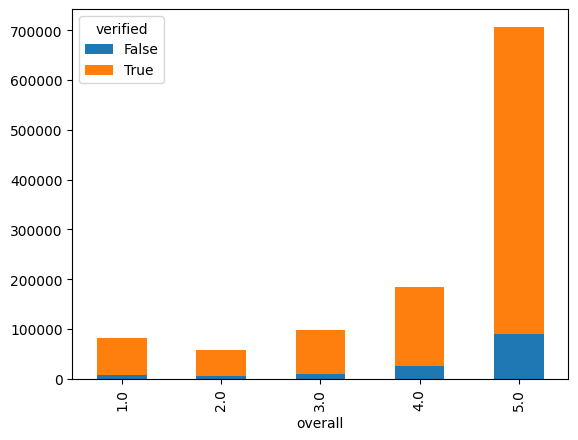

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


data_copy.groupby(['overall', 'verified']).size().unstack().plot(kind='bar', stacked=True)

### Relationship with Categorical Variables

In [17]:
df_agg = data_copy.groupby(['overall', 'asin']).size()

In [18]:
df_agg.nlargest(10)

overall  asin      
5.0      B00VH88CJ0    1426
         B00X5RV14Y    1311
         B019PV2I3G    1282
         B00P7N0320    1258
         B018JW3EOY    1252
         B005NF5NTK    1224
         B00MQSMDYU    1090
         B00M51DDT2    1023
         B00G7UY3EG    1014
         B00IGISUTG     910
dtype: int64

## 3.0 The 4 C's of data cleaning: completing, correction, creating, and converting

### 3.1 Completing 
- Completing missing information

In [19]:
data_copy.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              523196
reviewerName          135
reviewText            765
summary               517
unixReviewTime          0
vote              1036403
image             1101330
dtype: int64

In [20]:
def get_nan_ocols(df, nan_percent=0.7):
    """ This function will determine what columns to drop based on our threshold

    Args:
        df (pandas df): dataframe that holds our data
        nan_percent (float, optional): Defaults to 0.7.

    Returns:
        list: list of columns to drop based on our threshold
    """
    threshold = len(df.index) * nan_percent
    return [c for c in df.columns if df[c].isnull().sum() >= threshold]

In [21]:
cols_to_del = get_nan_ocols(data_copy, .7)
cols_to_del

['vote', 'image']

In [22]:
data_copy = data_copy.drop(['vote', 'image'], axis=1)

In [23]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
841434,1.0,True,"01 27, 2018",A39ZUJG5309NOC,B014XT2UTM,{'Color:': ' Dark blue'},Tall Tom,"This isn't a case, it's a skin and will offer ...",Mis-leading name - this is a Skin not a case -...,1517011200


In [24]:
data_copy = data_copy.drop(['style'], axis=1)

In [25]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
458927,5.0,True,"08 24, 2016",A2ZRGK6FS0K2ZB,B00L0RIVSU,Alexis,"Great color, turned really dirty after a year....",Perfect,1471996800


In [26]:
data_copy.isnull().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName      135
reviewText        765
summary           517
unixReviewTime      0
dtype: int64

In [27]:
data_copy = data_copy.drop(['reviewerName'], axis=1)

In [28]:
data_copy = data_copy.dropna(axis=0)

In [29]:
data_copy.isnull().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64

In [30]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime
548482,3.0,True,"10 8, 2016",A3VY2ESHD585FH,B00NG8SA32,Not really good screen protector.,Inexpensive but low quality.,1475884800


### 3.2 Correction
- Correcting values and outliers
- We could have possible outliers in any of the numeric columns

There are no outliers in the 'unixReviewTime' column because there are no outliers in time.

### 3.3 Feature engineering
- Creating new features for analysis

C:\Users\migue\AppData\Local\Temp\ipykernel_13704\3959593196.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data_copy.corr()


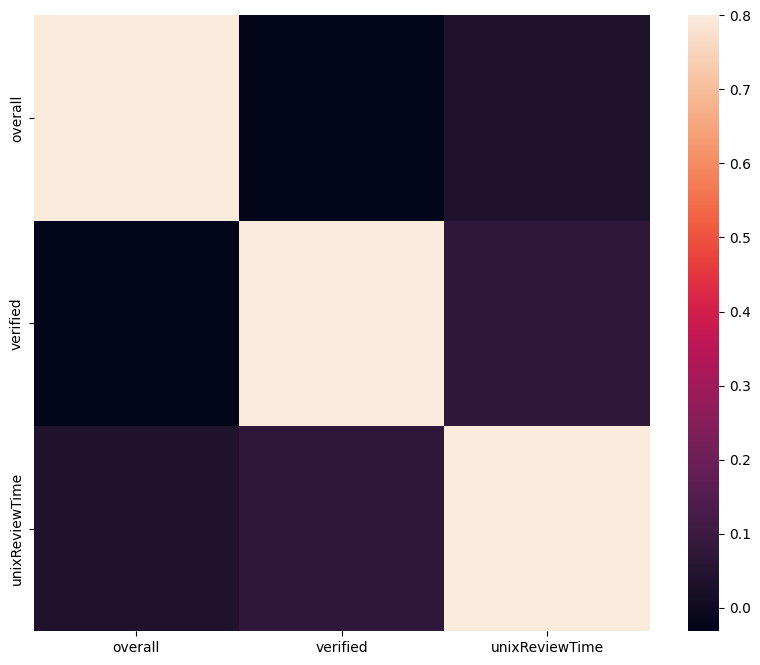

In [31]:
corrmat = data_copy.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=.8, square=True);

In [32]:
from collections import Counter

Counter(" ".join(data_copy["reviewText"]).split()).most_common(10)

[('the', 2643224),
 ('I', 1574142),
 ('and', 1544972),
 ('a', 1387653),
 ('to', 1370796),
 ('it', 1142523),
 ('is', 967868),
 ('my', 734072),
 ('for', 723219),
 ('of', 714386)]

### 3.4 Converting 
- Converting fields to the correct format for calculations and presentation

## 4.0 Build model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #used for one-hot encoding

temp = data_copy[:1000]

le = LabelEncoder() 
y = le.fit_transform(temp['overall'].values)

In [34]:
X = temp['reviewText']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2, random_state=69
)

In [35]:
print(X_train.shape)
X_test.shape

(800,)


(200,)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
vectorizer.fit(list(X_train) + list(X_test)) #if the vectorizer is not same size as dataset, then the code breaks

X_train_vectorizer = vectorizer.transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

In [37]:
pd_array = pd.DataFrame(X_train_vectorizer.toarray()) #helps visual the one-hot encoding for you guys to read
pd_array

,0,1,2,3,4,5,6,7,8,9,...,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.123179,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.087173,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.465592,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
796,0.0,0.166713,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
797,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
798,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.161208,0.0,0.000000,0.000000,0.0,0.0,0.0


In [38]:
from sklearn.linear_model import LogisticRegression

accuracy_metric = {}

lr_model = LogisticRegression()
lr_model.fit(X_train_vectorizer, y_train)
acc = lr_model.score(X_test_vectorizer, y_test)*100
accuracy_metric['Logistic Regression'] = acc

print("Logistic Regression Accuracy:  {:.2f}%".format(acc))

Logistic Regression Accuracy:  57.00%


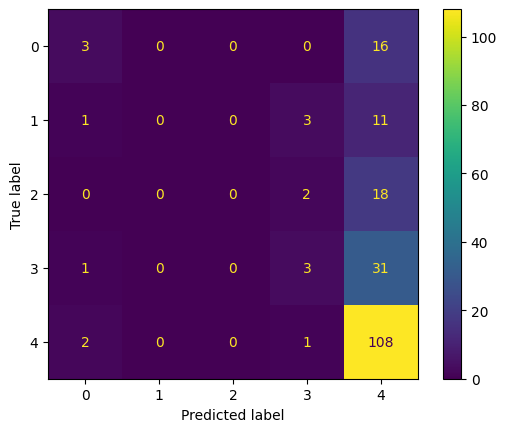

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = lr_model.predict(X_test_vectorizer)

cmatrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cmatrix)
cm_display.plot();

In [40]:
from xgboost import  XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_vectorizer, y_train)
y_pred = xg.predict(X_test_vectorizer)

predictions = [round(value) for value in y_pred]
acc = xg.score(X_test_vectorizer, y_test)*100

accuracy_metric['XGBoost'] = acc
print("XGBoost Accuracy:  {:.2f}%".format(acc))

XGBoost Accuracy:  54.50%


In [41]:
print(accuracy_metric)

{'Logistic Regression': 56.99999999999999, 'XGBoost': 54.50000000000001}


In [42]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [43]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_train_vectorizer, y_train), ( X_test_vectorizer, y_test)]

    clf.fit(X_train_vectorizer, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X_test_vectorizer)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


In [44]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.075                                                  
SCORE:                                                 
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                        

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.075                                                                 
SCORE:                                                                
0.08                                                                  
SCORE:                                                                
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:       

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:              

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:                                                               
0.075                                                                
SCORE:              

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

In [45]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6119982203090195, 'gamma': 1.405667349915987, 'max_depth': 14.0, 'min_child_weight': 5.0, 'reg_alpha': 94.0, 'reg_lambda': 0.17163523222864052}


In [46]:
xg = XGBClassifier(colsample_bytree=0.8776529783016755, gamma=2.253526149206971, max_depth=7, min_child_weight=0, reg_alpha=53, reg_lambda=0.40500068841728565)
xg.fit(X_train_vectorizer, y_train)

# make predictions for test data
y_pred = xg.predict(X_test_vectorizer)
predictions = [round(value) for value in y_pred]

acc = xg.score(X_test_vectorizer, y_test)*100
accuracy_metric['XGBoost'] = acc
print("XGBoost Accuracy: {:.2f}%".format(acc))

XGBoost Accuracy: 55.50%


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_vectorizer, y_train)
predictions = knn.predict(X_test_vectorizer)

acc = knn.score(X_test_vectorizer, y_test)*100
accuracy_metric['KNN'] = acc
print("KNN Accuracy: {:.2f}%".format(acc))

KNN Accuracy: 55.50%


## 5.0 Evaluate model

In [62]:
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np

f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f"f1: {f1}")

recall = recall_score(y_test, y_pred, average = 'weighted')
print(f"recall: {recall}")

precision = precision_score(y_test, y_pred, average = 'weighted')
print(f"precision: {precision}")

f1: 0.3961736334405145
recall: 0.555
precision: 0.308025


c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6.0 Predictions

## 7.0 If predictions suck, hyperparameter tune

## 8.0 Repeat steps 4-7 until satisfied